# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_bnb = pd.read_csv('files/AB_NYC_2019.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#1 Which hosts are the busiest and why?
print("\n#1 These are the top 5 of busiest hosts based on their number of listings.")

air_bnb.groupby(['host_id', 
                 'host_name'], as_index=False)['id'].size().sort_values(by= 'size', ascending=False).head().rename(columns= {'size': 'listing_count'})


#1 These are the top 5 of busiest hosts based on their number of listings.


,host_id,host_name,listing_count
34629,219517861,Sonder (NYC),327
29393,107434423,Blueground,232
19564,30283594,Kara,121
31064,137358866,Kazuya,103
14429,16098958,Jeremy & Laura,96


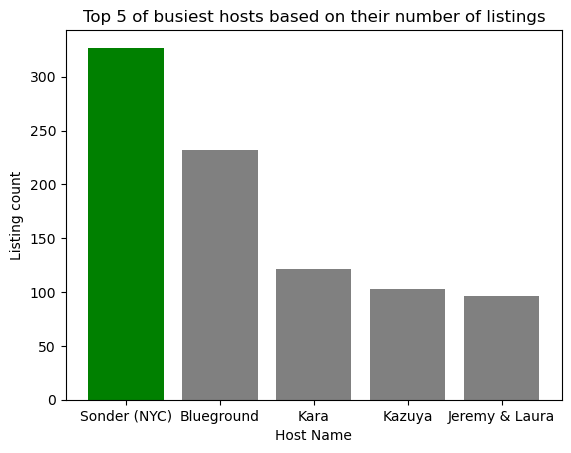

In [5]:
df = air_bnb.groupby(['host_id', 
                 'host_name'], as_index=False)['id'].size().sort_values(by= 'size', ascending=False).head().rename(columns= {'size': 'listing_count'})

plt.bar(df['host_name'], 
        height= df['listing_count'],
        color = ['green', 'gray', 'gray', 'gray', 'gray'])

plt.ylabel('Listing count')
plt.xlabel('Host Name')
plt.title('Top 5 of busiest hosts based on their number of listings')
plt.show()

In [6]:
#2 How many neighborhood groups are available and which shows up the most?

print("\n#2 There are 5 neighborhood groups available. \n\tManhattan has the most listings out of these groups.")
air_bnb.groupby('neighbourhood_group', as_index=False).size().sort_values(by= 'size', ascending=False).rename(columns= {'size': 'listing_count'})


#2 There are 5 neighborhood groups available. 
	Manhattan has the most listings out of these groups.


,neighbourhood_group,listing_count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


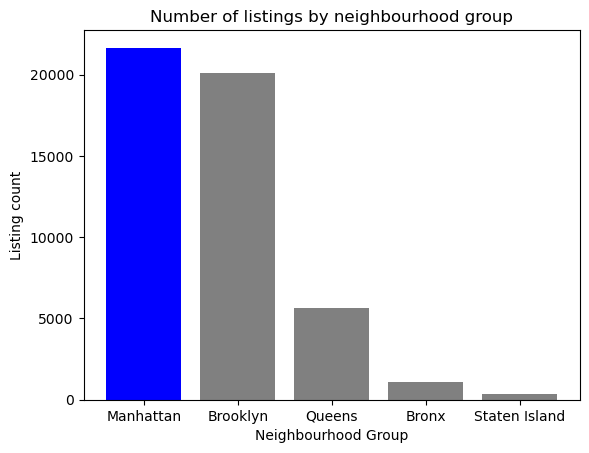

In [7]:
df = air_bnb.groupby('neighbourhood_group', as_index=False).size().sort_values(by= 'size', ascending=False).rename(columns= {'size': 'listing_count'})

plt.bar(df['neighbourhood_group'], 
        height= df['listing_count'],
        color = ['blue', 'gray', 'gray', 'gray', 'gray'])

plt.ylabel('Listing count')
plt.xlabel('Neighbourhood Group')
plt.title('Number of listings by neighbourhood group')
plt.show()

In [8]:
#3 Are private rooms the most popular in manhattan?

print("\n#3 No - Entire home/apt appears to be the most popular in Manhattan. \nPrivate room is the second most popular.")
manhattan_data = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
manhattan_data.groupby(['neighbourhood_group', 'room_type'], 
                as_index=False).size().sort_values(by= 'size', ascending= False).rename(columns= {'size': 'count'})


#3 No - Entire home/apt appears to be the most popular in Manhattan. 
Private room is the second most popular.


,neighbourhood_group,room_type,count
0,Manhattan,Entire home/apt,13199
1,Manhattan,Private room,7982
2,Manhattan,Shared room,480


In [46]:
pd.crosstab(air_bnb['neighbourhood_group'], air_bnb['room_type'], margins= True)

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,379,652,60,1091
Brooklyn,9559,10132,413,20104
Manhattan,13199,7982,480,21661
Queens,2096,3372,198,5666
Staten Island,176,188,9,373
All,25409,22326,1160,48895


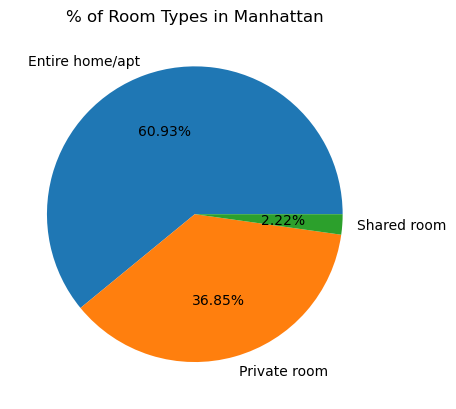

In [10]:
df = manhattan_data.groupby(['neighbourhood_group', 'room_type'], 
                as_index=False).size().sort_values(by= 'size', ascending= False).rename(columns= {'size': 'count'})

plt.pie(df['count'], 
        labels= df['room_type'],
        autopct= '%.2f%%')
plt.title('% of Room Types in Manhattan')
plt.show()

In [11]:
#4 Which hosts are the busiest and based on their reviews?

print("\n#4 These are the top 5 busiest hosts based on their number of reviews.")
air_bnb.groupby(['host_id', 'host_name'], 
                as_index=False).sum()[['host_id','host_name','number_of_reviews']].sort_values(by= 'number_of_reviews',
                                                                                               ascending= False).head().rename(columns= {'number_of_reviews': 'total_reviews'})


#4 These are the top 5 busiest hosts based on their number of reviews.


,host_id,host_name,total_reviews
21304,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18626,26432133,Danielle,2017
20872,35524316,Yasu & Akiko,1971
21921,40176101,Brady,1818


In [12]:
#5 Which neighorhood group has the highest average price?

print("\n#5 Manhattan has the highest average price out of the 5 neighorhood groups.")
air_bnb.groupby('neighbourhood_group', as_index=False).mean(numeric_only=True).round(decimals=2)[['neighbourhood_group','price']].sort_values(by= 'price',
                                                                                    ascending= False).head().rename(columns= {'price': 'avg_price'})


#5 Manhattan has the highest average price out of the 5 neighorhood groups.


,neighbourhood_group,avg_price
2,Manhattan,196.88
1,Brooklyn,124.38
4,Staten Island,114.81
3,Queens,99.52
0,Bronx,87.50


In [13]:
#6 Which neighborhood group has the highest total price?

print("\n#6 Manhattan has the highest total price out of the 5 neighorhood groups.")
grouped_price = air_bnb.groupby('neighbourhood_group', 
                                as_index=False).sum()[['neighbourhood_group','price']].sort_values(by= 'price',
                                                                                                   ascending= False).head().rename(columns= {'price': 'total_price'})
format_dict = {'total_price':'{0:,.0f}'}
grouped_price.style.format(format_dict)



#6 Manhattan has the highest total price out of the 5 neighorhood groups.


,neighbourhood_group,total_price
2,Manhattan,"4,264,527"
1,Brooklyn,"2,500,600"
3,Queens,"563,867"
0,Bronx,"95,459"
4,Staten Island,"42,825"


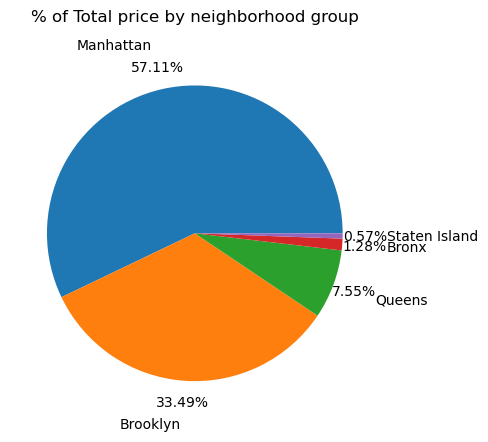

In [14]:
df= grouped_price = air_bnb.groupby('neighbourhood_group', 
                                as_index=False).sum()[['neighbourhood_group','price']].sort_values(by= 'price',
                                                                                                   ascending= False).head().rename(columns= {'price': 'total_price'})

plt.pie(df['total_price'], 
        labels= df['neighbourhood_group'],
        autopct= '%.2f%%',
        pctdistance= 1.15,
        labeldistance= 1.3)
plt.title('% of Total price by neighborhood group', y= 1.05)
plt.show()

In [15]:
#7 Which top 5 hosts have the highest total price?

print("\n#7 These are the top 5 hosts that have the higest total price.")
grouped_price = air_bnb.groupby(['host_id', 'host_name'], 
                                as_index=False).sum()[['host_id', 'host_name','price']].sort_values(by= 'price',
                                                                                                   ascending= False).head().rename(columns= {'price': 'total_price'})
format_dict = {'total_price':'{0:,.0f}'}
grouped_price.style.format(format_dict)



#7 These are the top 5 hosts that have the higest total price.


,host_id,host_name,total_price
34629,219517861,Sonder (NYC),"82,795"
29393,107434423,Blueground,"70,331"
32054,156158778,Sally,"37,097"
34034,205031545,Red Awning,"35,294"
19564,30283594,Kara,"33,581"


In [17]:
#8 Who currently has no (zero) availability with a review count of 100 or more?

print("\n#8 There are 147 hosts who have no availability with a review count of 100 or more.")
filtered_data = air_bnb[air_bnb['availability_365'] == 0]
filtered_data = filtered_data[filtered_data['number_of_reviews'] >= 100]

filtered_data.groupby(['host_id', 'host_name'], 
                as_index=False).sum()[['host_id', 'host_name','number_of_reviews','availability_365']].sort_values(by= 'number_of_reviews',
                                                                                                                   ascending= False)


#8 There are 147 hosts who have no availability with a review count of 100 or more.


,host_id,host_name,number_of_reviews,availability_365
90,22959695,Gurpreet Singh,1061,0
135,99392252,Michael,732,0
139,121391142,Deloris,693,0
16,792159,Wanda,480,0
112,37818581,Sofia,432,0
...,...,...,...,...
98,26073602,Anna,101,0
127,84141923,Marisha,100,0
116,42399786,Braydon,100,0
134,96148809,Raymond,100,0


In [18]:
#9 What host has the highest total of prices and where are they located?

print("\n#9 Sonder (NYC) - the host's listings in Manhattan-Financial District has the highest total price.")
grouped_price = air_bnb.groupby(['host_id', 
                                 'host_name', 
                                 'neighbourhood_group', 
                                 'neighbourhood'], 
                                as_index=False).sum()[['host_id', 
                                                       'host_name', 
                                                       'neighbourhood_group', 
                                                       'neighbourhood', 
                                                       'price']].sort_values(by= 'price', ascending= False).head().rename(columns= {'price': 'total_price'})
format_dict = {'total_price':'{0:,.0f}'}
grouped_price.style.format(format_dict)




#9 Sonder (NYC) - the host's listings in Manhattan-Financial District has the highest total price.


,host_id,host_name,neighbourhood_group,neighbourhood,total_price
35431,219517861,Sonder (NYC),Manhattan,Financial District,"57,738"
34816,205031545,Red Awning,Manhattan,Midtown,"35,294"
6301,3750764,Kevin,Manhattan,Chelsea,"18,780"
2009,836168,Henry,Manhattan,Upper West Side,"15,000"
2475,1177497,Jessica,Brooklyn,Clinton Hill,"14,850"


In [19]:
grouped_price = air_bnb.groupby(['host_id', 
                                 'host_name', 
                                 'neighbourhood_group'], 
                                as_index=False).sum()[['host_id', 
                                                       'host_name', 
                                                       'neighbourhood_group', 
                                                       'price']].sort_values(by= 'price', ascending= False).head().rename(columns= {'price': 'total_price'})
format_dict = {'total_price':'{0:,.0f}'}
grouped_price.style.format(format_dict)


,host_id,host_name,neighbourhood_group,total_price
34740,219517861,Sonder (NYC),Manhattan,"82,795"
29481,107434423,Blueground,Manhattan,"69,741"
34141,205031545,Red Awning,Manhattan,"35,294"
19626,30283594,Kara,Manhattan,"33,581"
32152,156158778,Sally,Manhattan,"29,194"


In [20]:
#10 When did Danielle from Queens last receive a review?

print("\n#10 Danielle from Queens last received a review on 2019-07-08.")
filtered_data = air_bnb[air_bnb['host_name'] == 'Danielle']
filtered_data = filtered_data[filtered_data['neighbourhood_group'] == 'Queens']
filtered_data.sort_values(by='last_review', ascending=False)


#10 Danielle from Queens last received a review on 2019-07-08.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0


## Further Questions

1. Which host has the most listings?

In [21]:
print("\nSonder (NYC) has the most listings.")
air_bnb.groupby(['host_id', 'host_name'], as_index=False).size().sort_values(by= 'size', ascending=False).head().rename(columns= {'size': 'count'})


Sonder (NYC) has the most listings.


,host_id,host_name,count
34629,219517861,Sonder (NYC),327
29393,107434423,Blueground,232
19564,30283594,Kara,121
31064,137358866,Kazuya,103
14429,16098958,Jeremy & Laura,96


2. How many listings have completely open availability?

In [22]:
print("\nThere are 1,295 listings that have completely open availability.")
filtered_data = air_bnb[air_bnb['availability_365'] == 365]
filtered_data.groupby('availability_365', as_index=False).size().rename(columns= {'size': 'count'})



There are 1,295 listings that have completely open availability.


,availability_365,count
0,365,1295


3. What room_types have the highest review numbers?

In [23]:
print("\nEntire home/apt has the highest review numbers in total.")
air_bnb.groupby(['room_type'], as_index=False)['number_of_reviews'].agg(['mean', 'sum']).rename(columns= {'mean': 'avg_reviews_num', 'sum': 'total_reviews_num'}).style.format({'total_reviews_num':'{0:,.0f}', 'avg_reviews_num':'{0:.2f}'})


Entire home/apt has the highest review numbers in total.


,room_type,avg_reviews_num,total_reviews_num
0,Entire home/apt,22.84,"580,403"
1,Private room,24.11,"538,346"
2,Shared room,16.60,"19,256"


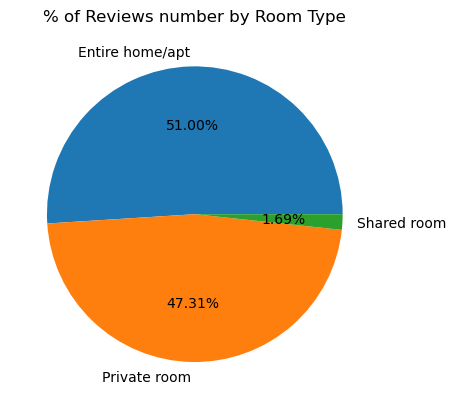

In [25]:
df= air_bnb.groupby(['room_type'], as_index=False)['number_of_reviews'].agg(['mean', 'sum']).rename(columns= {'mean': 'avg_reviews_num', 'sum': 'total_reviews_num'})

plt.pie(df['total_reviews_num'], 
        labels= df['room_type'],
        autopct= '%.2f%%')
plt.title('% of Reviews number by Room Type')
plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [47]:
print("""
AirBnB NY Locations dataset has the total numbers of 48,895 listings and 16 columns.
The dataset collects listing information including host info, location, room type, price, reviews, and availability.
After analyzing the data, below is what was found:

1) Locations: Manhattan is the most popular location and the most pricey out of all 5 boroughs.
    > (#2)There are 5 neighborhood groups available in NYC: Manhattan, Brooklyn, Queens, Bronx, and Staten Island.
            Manhattan has the most listings out of all locations for the total of 21,661 listings.
            Staten Island has the least listings of 373.
    > (#5)Mahhattan also has the highest average price of $196.88 per listing. 
            The lowest is in the Bronx with the average price of $87.50 per listing.
    > (#6)Manhattan has the highest price in total of $4,264,527. 
            State Island has the lowest price in total of $42,825.
                
2) Hosts: Host Sonder(NYC) has the highest number of listings and total price of listings.
            But Host Maya appears to be more popular with the highest number of reviews in total.
    > (#1)Host Sonder(NYC)(id: 219517861) is the busiest host based on the total listing numbers of 327.
            (#7)This host has the higest listing price in total of $82,795.
            (#9)All of Sonder(NYC)'s listings is in Manhattan. 
                Financial District is the area with the highest listing price of $57,738 (out of $82,795).
    > (#4)While Host Maya (id: 37312959) is the busiest and more popular based on the total reviews of 2,273.
            Host Sonder(NYC) is not even listed in the top 5 based on number of reviews.
    > (#8)There are 147 hosts who have no availability with a review count of 100 or more.
            Host Gurpreet Singh (id: 22959695) is the host who has the highest reviews of 1,061 among the hosts with no availability.
    > (#10)Host Danielle from Queens last received a review on 2019-07-08.
        
3) Room type: Entire home/apt is the most popular room type based on the number of listings.
    > (#3)The most popular room type in Manhattan is Entire home/apt based on the total listings of 13,199.
            Shared room has the least total of listings for only 480.
            Manhattan is the only location with Entire home/apt type is most popular.
            Private room is the most popular in other 4 boroughs.
    > (F#3)Entire home/apt also has the highest reviews in total of 580,403 reviews (from all 5 boroughs)
            Private room appears to have slightly higher average reviews (24 reviews) per listing than Entire home/apt (22 reviews)

4) Availability: There are 1,295 listings that have completely open availability.
""")






AirBnB NY Locations dataset has the total numbers of 48,895 listings and 16 columns.
The dataset collects listing information including host info, location, room type, price, reviews, and availability.
After analyzing the data, below is what was found:

1) Locations: Manhattan is the most popular location and the most pricey out of all 5 boroughs.
    > (#2)There are 5 neighborhood groups available in NYC: Manhattan, Brooklyn, Queens, Bronx, and Staten Island.
            Manhattan has the most listings out of all locations for the total of 21,661 listings.
            Staten Island has the least listings of 373.
    > (#5)Mahhattan also has the highest average price of $196.88 per listing. 
            The lowest is in the Bronx with the average price of $87.50 per listing.
    > (#6)Manhattan has the highest price in total of $4,264,527. 
            State Island has the lowest price in total of $42,825.
                
2) Hosts: Host Sonder(NYC) has the highest number of listings 